## Exercise 2

In [5]:
# Import packages
import numpy as np
import math
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Initialize parameters
alpha = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24

# Definefunctions
def demand(w, alpha, z, k):
    return ((((1-alpha)*z)/w)**(1/alpha))*k

def profit(w, alpha, z, k):
    nd = demand(w, alpha, z, k)
    return z*(k**alpha)*(nd)**(1-alpha) - w*nd

def supply(w, alpha, z, k, b, h, t):
    pi = profit(w, alpha, z, k)
    return h - (b/(w*(1+b)))*(w*h+pi-t)
    

In [6]:
"""Find the market-clearing wage rate using fsolve."""

f = lambda w: demand(w, alpha, z, k) - supply(w, alpha, z, k, b, h, t)
w_opt = fsolve(f, 0.5)[0]

print("Market-clearing wage: " +str(w_opt))

Market-clearing wage: 0.627361779044


In [7]:
"""Find a first-order approximation for wage as a function of k."""
w0 = w_opt
k0 = 5
f0 = f(w0)
inc = 1e-6

#Numerical methods to approximate Fk
k = k0 + inc
f1 = f(w0)
k = k - inc
Fk = (f1-f0)/inc

#Numerical methods to approxmate Fw.
w1 = w0 + inc
f1 = f(w1)
Fw = (f1-f0)/inc

slope = -Fk/Fw

order1 = lambda k: w0 + slope*(k-k0)

In [8]:
"""Find a second-order approximation also about k = 5."""

#Numerical methods to approximate Fkk
k = k0 + inc
fc = f(w0)
k = k - inc
fb = f(w0)
k = k - inc
fa = f(w0)
k = k + inc
Fkk  = (fc - 2*fb + fa)/inc**2

#Numerical methods to approximate Fwk
k = k0 + inc
whigh = w0 + inc
fa = f(whigh)

wlow = w0 - inc
fb = f(wlow)

k = k0 - inc
fc = f(wlow)
fd = f(whigh)

k = k0

Fwk = (fa - fd - fb + fc)/(4*inc**2)

#Numerical methods to approximate Fww
fa = f(whigh)
fb = f(w0)
fc = f(wlow)
Fww = (fa - 2*fb + fc)/(inc**2)

#Numerical methods to approximate wk
k = k0 + inc
w1 = fsolve(f, 0.5)[0]
k = k0
wk = (w1 - w0)/inc

a = -(Fww*wk**2 + 2*Fwk*wk + Fkk)/Fw
order2 = lambda k: order1(k) + 0.5*a*(k-k0)**2

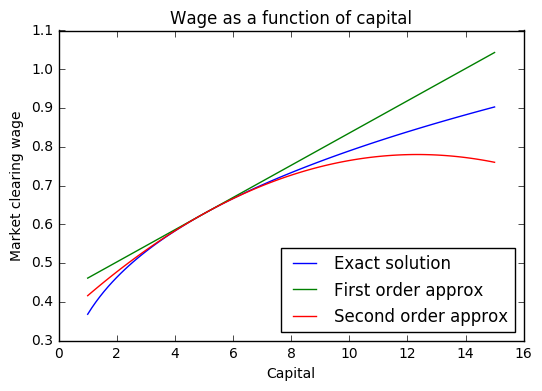

In [9]:
"""Set up a grid. Use fsolve to find the equilibrium value
of the wage at each point onthe grid."""

k_grid = np.linspace(1, 15, 100)
w_opt = []
for k_val in k_grid:
    g = lambda w: demand(w, alpha, z, k_val) - supply(w, alpha, z, k_val, b, h, t)
    w_opt.append(fsolve(g, 0.5)[0])
    
plt.plot(k_grid, w_opt, label="Exact solution")
plt.plot(k_grid, order1(k_grid), label="First order approx")
plt.plot(k_grid, order2(k_grid), label="Second order approx")
plt.title("Wage as a function of capital")
plt.xlabel("Capital")
plt.ylabel("Market clearing wage")
plt.legend(loc = "lower right")
plt.show()

## Exercise 3

In [53]:
"""True solution"""
x0 = 100
h = lambda y: (x0**(.35) + .9*x0 - y)**(-2.5) - .95*(y**.35 + .9*y)**(-2.5)
y0 = fsolve(h, 50)[0]
y0

47.465787535327969

In [54]:
"""Linear approximation"""
y0 = y0
x0 = 100
inc = 1e-6

def F(x,y):
    return (x**.35 + .9*x - y)**(-2.5) - .95*(y**.35 + .9*y)**(-2.5)

def Fx(x,y):
    return (F(x+inc, y) - F(x-inc, y))/(2*inc)

def Fy(x,y):
    return (F(x, y+inc) - F(x, y-inc))/(2*inc)

slope = -Fx(x0,y0)/Fy(x0,y0)

def linear(x):
    return y0 + slope*(x-x0)

In [61]:
"""Quadratic approximation"""

def Fxx(x,y):
    return (F(x+inc, y)-2*F(x,y)+F(x-inc,y))/(inc**2)

def Fyy(x,y):
    return (F(x, y+inc)-2*F(x,y)+F(x, y-inc))/(inc**2)

def Fxy(x,y):
    return (F(x+inc,y+inc) - F(x-inc, y+inc) - F(x+inc, y-inc) + F(x-inc, y-inc))/(4*inc**2)

def yx(x,y):
    return -Fx(x,y)/Fy(x,y)

slope2 = -(Fyy(x0,y0)*(yx(x0,y0))**2 + 2*Fxy(x0,y0)*yx(x0,y0) +Fxx(x0,y0))/(Fy(x0,y0))

def quadratic(x):
    return linear(x) + 0.5*slope2*(x-x0)**2

In [62]:
"""Cubic approximation"""

def Fxxx(x, y):
    return (F(x+2*inc, y)-2*F(x+inc,y)+2*F(x-inc,y)-F(x-2*inc,y))/(2*inc**3)

def Fxxy(x, y):
    return (F(x+2*inc,y+inc) - 2*F(x, y+inc) - F(x+2*inc, y-inc)+F(x-2*inc,y+inc)+2*F(x, y-inc)-F(x-2*inc, y-inc))/(8*inc)

def Fxyy(x, y):
    return (F(x-inc,y+2*inc)-2*F(x-inc,y)-F(x+inc,y+2*inc)+2*F(x-inc,y-2*inc)-F(x+inc,y-2*inc))/(8*inc)

def Fyyy(x, y):
    return (F(x,y+2*inc)-2*F(x,y+inc)+2*F(x,y-inc)-F(x,y-2*inc))/(2*inc**3)

def yxx(x,y):
    return (Fyy(x, y)*(yx(x, y)**2) + 2*Fxy(x, y)*yx(x, y) + Fxx(x, y))/Fy(x, y)
    
num = Fyyy(x0,y0)*(yx(x0,y0))**3 + 3*(yx(x0,y0))**2*Fxyy(x0,y0) + 3*Fyy(x0,y0)*yx(x0,y0)*yxx(x0,y0) + 3*Fxxy(x0,y0)*yx(x0,y0) + 3*Fxy(x0,y0)*yx(x0,y0)+Fyyy(x0,y0)
denom = Fy(x0,y0)
slope3 = -num/denom

def cubic(x):
    return quadratic(x) + (1/3)*slope3*(x-x0)**3

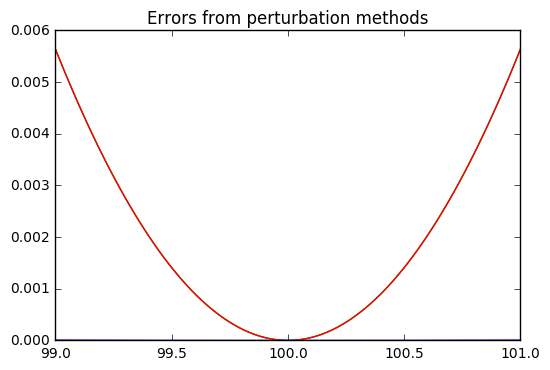

In [67]:
"""Set up a grid. Use fsolve to find the equilibrium value
of the wage at each point onthe grid."""

x_grid = np.linspace(99, 101, 100)
y_opt = []
for x_val in x_grid:
    h = lambda y: (x_val**.35 + .9*x_val - y)**(-2.5) - .95*(y**.35 + .9*y)**(-2.5)
    y_new = fsolve(h,50)[0]
    y_opt.append(y_new)  
    
errors1 = abs(y_opt - linear(x_grid))
errors2 = abs(y_opt- quadratic(x_grid))

plt.plot(x_grid, errors1)
plt.plot(x_grid, errors2)
plt.plot(x_grid, errors2)
plt.title("Errors from perturbation methods")
plt.show()

#IF WE WANTED TO PLOT THE FUNCTIONS
#plt.plot(x_grid, y_opt, label="Exact solution")
#plt.plot(x_grid, linear(x_grid), label="Linear")
#plt.plot(x_grid, quadratic(x_grid), label='Quadratic')
#plt.plot(x_grid, cubic(x_grid), label='Cubic')
#plt.legend(loc = "upper left")
#plt.show()

## Exercise 4

In [68]:
#Parameter values

gamma = 2.5
beta = 0.98
alpha = 0.40
delta = 0.10
tau = 0.05